<a href="https://colab.research.google.com/github/SergeyHSE/RegionAnalysis.github.io/blob/main/RegionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Особенности сельского хозяйства Белогородской области**

Белгородская область располагается на юго-западе Российской Федерации и является частью Центрального федерального округа. При этом сама область в её нынешних границах образовалась "в 1954 году" [[1](https://belregion.ru/region/history.php)]. Её общая площадь равна 27,1 тысячам кв. киллометров. В состав области входят "13 муниципльных районов и 9 городских округов". Население Белгородской области распределено в общем-то равномерно, с учётом того что даже Белгород не дотягивет до отметки в 400 тыс. человек. "Процент сельского населения приблизительно равен 35". И это немногим меньше, чем в Ставропольском крае, что говорит о неплохом развитии сельского хозяйства [[2](https://31.rosstat.gov.ru/storage/mediabank/0107_2022.pdf)].

 Несмотря на то, что Белгородская область является одним из главной региононв России по добыче железной руды, уже долгие годы она также является главным регионом по производству свинины. Область кроме всего прочего обладает большими площадами чернозёма. В целом отрасль сельского хозяйства Белгородской области и его базовая отрасль является системообразующей сферой экономики. Общая площадь пашни составляет приблизительно "1,3% от общероссийской". "Белгородская область производит 4,0% общероссийского объема продукции сельского хозяйства, по центральному федеральному округу этот показатель составляет около 16,0%" [[3](https://belregion.ru/region/priorities/selskoe-khozyaystvo/)].

 Более детальное представление о структуре сельского хозяйства Белгородской области даст анализ данных всероссийской сельскохозяйственной перепеси 2016 года. Для начала стоит взглянуть на основные показатели растениеводства.





In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#######################################
# !!!!For jupyter, not for colab!!!!  #
#######################################

import pyodbc as sqlMS

connStr = (r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};" r"DBQ=C:\Users\User\Documents\книги\ВШЭ\учёба\Статистика\Анализ региона\БелгородСтаврополь.accdb;")
conn = sqlMS.connect(connStr)
cursor = conn.cursor()
strSQL = '''
SELECT БелгородскаяОбл.* FROM БелгородскаяОбл
'''
df = pd.read_sql(strSQL, conn)

cursor.close()
del cursor
conn.close()

df.to_csv('Regions.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ForColab/Regions.csv')

In [ ]:
df.head()

,Unnamed: 0,ОКТМО,Reg,Rai,Категория,ТипХоз,10001,11157,12157,11158,...,32348,11274,32126,Kf_hoz,Kf_A200,УсПог,СВ16_16,ГрСВ16_16,СВрас16,СВжив16
0,0,14605416101,14,14605,165,3,146057100465,0,0,1,...,1,0,3,1.0,1.0,0.143712,25.223959,4,7.013860,18.210098
1,1,14605416101,14,14605,165,3,146057100466,0,0,1,...,0,0,1,1.0,1.0,0.000000,71.536339,5,71.536339,0.000000
2,2,14605416101,14,14605,165,3,146057100467,0,0,1,...,1,0,2,1.0,1.0,0.199810,83.375305,5,58.056999,25.318308
3,3,14605408101,14,14605,165,3,146057102232,0,0,1,...,0,0,1,1.0,1.0,0.000000,48.643177,4,48.643177,0.000000
4,4,14605408101,14,14605,165,3,146057102233,0,0,1,...,0,0,3,1.0,1.0,0.000000,40.961994,4,40.961994,0.000000


In [ ]:
df['Rai'].value_counts()

14610    40803
14740    24856
14656    22064
14640    16955
14658    15778
14730    15416
14642    15179
14620    14977
14605    13979
14644    11529
14646    11299
14632    10061
14654     9428
14630     9004
14638     7502
14648     7343
14625     7194
14641     6981
14615     6757
14650     5914
14643     3771
14701     2963
Name: Rai, dtype: int64

In [4]:
Rai = pd.read_excel('/content/drive/MyDrive/ForColab/Районы.xlsx', header=None)

In [5]:
import re

Rai[0] = Rai[0].astype(str).str[:-3].astype(int)
Rai[1] = Rai[1].str.replace('"', '')
Rai[1] = Rai[1].str.replace(r'\s*Белгородской области\s*', ' ')
Rai[1] = Rai[1].str.replace(r'\s*Муниципальный район\s*', ' ')
Rai[1] = Rai[1].str.replace(r'\s*городской\s*', ' ')
Rai[1] = Rai[1].str.replace('муниципальный', '').str.replace('и город Алексеевка', '').str.strip()
Rai[1] = Rai[1].str.replace('и город Шебекино', '').str.strip()
Rai[1] = Rai[1].str.replace('Городской округ', '').str.strip()
Rai[1] = Rai[1].replace({'Город Валуйки и ': ''}, regex=True)
Rai[1] = Rai[1].str.replace(r'\s+', ' ')
print(Rai)

        0                        1
0   14605       Алексеевский район
1   14610       Белгородский район
2   14615        Борисовский район
3   14620          Валуйский район
4   14625       Вейделевский район
5   14630      Волоконовский район
6   14632      Грайворонский район
7   14638          Ивнянский район
8   14640        Корочанский район
9   14641        Красненский район
10  14642  Красногвардейский район
11  14643     Краснояружский район
12  14644     Новооскольский район
13  14646       Прохоровский район
14  14648        Ракитянский район
15  14650         Ровеньский район
16  14654         Чернянский район
17  14656        Шебекинский район
18  14658        Яковлевский район
19  14701           Город Белгород
20  14730         Губкинский округ
21  14740    Старооскольский округ


In [6]:
mapping = {
    14605: 'Алексеевский район',
    14610: 'Белгородский район',
    14615: 'Борисовский район',
    14620: 'Валуйский район',
    14625: 'Вейделевский район',
    14630: 'Волоконовский район',
    14632: 'Грайворонский район',
    14638: 'Ивнянский район',
    14640: 'Корочанский район',
    14641: 'Красненский район',
    14642: 'Красногвардейский район',
    14643: 'Краснояружский район',
    14644: 'Новооскольский район',
    14646: 'Прохоровский район',
    14648: 'Ракитянский район',
    14650: 'Ровеньский район',
    14654: 'Чернянский район',
    14656: 'Шебекинский район',
    14658: 'Яковлевский район',
    14701: 'Город Белгород',
    14730: 'Губкинский округ',
    14740: 'Старооскольский округ'
}

df['Region'] = df['Rai'].replace(mapping)

In [7]:
df['Region'].value_counts()

Белгородский район         40803
Старооскольский округ      24856
Шебекинский район          22064
Корочанский район          16955
Яковлевский район          15778
Губкинский округ           15416
Красногвардейский район    15179
Валуйский район            14977
Алексеевский район         13979
Новооскольский район       11529
Прохоровский район         11299
Грайворонский район        10061
Чернянский район            9428
Волоконовский район         9004
Ивнянский район             7502
Ракитянский район           7343
Вейделевский район          7194
Красненский район           6981
Борисовский район           6757
Ровеньский район            5914
Краснояружский район        3771
Город Белгород              2963
Name: Region, dtype: int64

In [8]:
import numpy as np
np.array(df.columns)

array(['Unnamed: 0', 'ОКТМО', 'Reg', 'Rai', 'Категория', 'ТипХоз',
       '10001', '11157', '12157', '11158', '12158', '11159', '11160',
       '11168', '11161', '11169', '11170', '11204', '11205', '11206',
       '11207', '11208', '11209', '11210', '11211', '11212', '11500',
       '11501', '11502', '11503', '11504', '11505', '11506', '11507',
       '11509', '11510', '11511', '11512', '11517', '11518', '11519',
       '11520', '11530', '11531', '11532', '11533', '11535', '11536',
       '11537', '11538', '11539', '11540', '11541', '11542', '11580',
       '11581', '11582', '11583', '11584', '11585', '11586', '11587',
       '11601', '11602', '11603', '11610', '11611', '11612', '11616',
       '11617', '11618', '11619', '11620', '11621', '11622', '13605',
       '11630', '11631', '11632', '11635', '11640', '11642', '11643',
       '11641', '11644', '11645', '11646', '11647', '11650', '11660',
       '11670', '11680', '11681', '11682', '11683', '11684', '11685',
       '11686', '11687'

In [9]:
data = df[['11159', '11160', '11169', '11170', '11204', '11205',
           '11206', '11207', '11208', '11209', '11210', '11211',
           '11501', '11502', '11503', '11504', '11506',
           '11510','11517', '11518', '11537', 'Rai', 'ТипХоз',
           '11530', '11535', '11540', '11542', '11421',
           '11711', '11725', '11580', '11581', '11610', '11629',
           '11710', '11712', '11755', '11765', '11780', '11790',
           '11845', '11900', 'Region', 'Kf_hoz', 'Kf_A200']]

In [ ]:
data.isna().any().any()

False

In [ ]:
data.shape

(279753, 45)

In [10]:
rows_with_zeros = data[data.eq(0).all(axis=1)]
print(f"Количество строк со всеми нулями: {len(rows_with_zeros)}")

Количество строк со всеми нулями: 0


In [11]:
column_mapping = {
    '11159': 'Работники',
    '11169': 'Постоянные',
    '11170': 'Сезонные',
    '11160': 'В_сельхозпроизводстве',
    '11204': 'Общая_площадь',
    '11205': 'Сельскохозяйственные_угодья',
    '11206': 'Пашня',
    '11207': 'Пары',
    '11167': 'Газон_рулонный',
    '11208': 'Сенокосы',
    '11209': 'Пастбища',
    '11210': 'Многолетние_насаждения',
    '11211': 'Залежь',
    '11501': 'Зерновые_и_зернобобовые',
    '11502': 'Пшеница_озимая',
    '11503': 'Пшеница_яровая',
    '11504': 'Рожь_озимая',
    '11506': 'Ячмень_озимый',
    '11510': 'Кукуруза_на_зерно',
    '11517': 'Зернобобовые_культуры',
    '11530': 'Технические_культуры',
    '11518': 'Горох',
    '11537': 'Подсолнечник_на_зерно',
    '11542': 'Рапс яровой',
    '11535': 'Свекла_сахарная',
    '11540': 'Соя',
    '11580': 'Картофель',
    '11581': 'Овощные_и_бахчевые',
    '11610': 'Кормовые_культуры',
    '11629': 'Плодовые_и_ягодные',
    '11710': 'КРС',
    '11711': 'КРС_молоко',
    '11712': 'Коровы_молочные',
    '11725': 'КРС_мясной',
    '11755': 'Свиньи',
    '11765': 'Овцы',
    '11780': 'Козы',
    '11790': 'Птица',
    '11845': 'Лошади',
    '11421': 'Тракторы',
    '11900': 'Кролики'
}

data.rename(columns=column_mapping, inplace=True)

In [ ]:
data.columns

Index(['Работники', 'В_сельхозпроизводстве', 'Постоянные', 'Сезонные',
       'Общая_площадь', 'Сельскохозяйственные_угодья', 'Пашня', 'Пары',
       'Сенокосы', 'Пастбища', 'Многолетние_насаждения', 'Залежь',
       'Зерновые_и_зернобобовые', 'Пшеница_озимая', 'Пшеница_яровая',
       'Рожь_озимая', 'Ячмень_озимый', 'Кукуруза_на_зерно',
       'Зернобобовые_культуры', 'Горох', 'Подсолнечник_на_зерно', 'Rai',
       'ТипХоз', 'Технические_культуры', 'Свекла_сахарная', 'Соя',
       'Рапс яровой', 'Тракторы', 'КРС_молоко', 'КРС_мясной', 'Картофель',
       'Овощные_и_бахчевые', 'Кормовые_культуры', 'Плодовые_и_ягодные', 'КРС',
       'Коровы_молочные', 'Свиньи', 'Овцы', 'Козы', 'Птица', 'Лошади',
       'Кролики', 'Region', 'Kf_hoz', 'Kf_A200'],
      dtype='object')

In [12]:
col_plant = ['Общая_площадь', 'Сельскохозяйственные_угодья', 'Пашня', 'Пары',
             'Сенокосы', 'Пастбища', 'Многолетние_насаждения', 'Залежь',
             'Зерновые_и_зернобобовые', 'Пшеница_озимая', 'Пшеница_яровая',
             'Рожь_озимая', 'Ячмень_озимый',
             'Кукуруза_на_зерно', 'Зернобобовые_культуры', 'Горох', 'Подсолнечник_на_зерно',
             'Технические_культуры', 'Свекла_сахарная', 'Соя', 'Рапс яровой',
             'Картофель', 'Овощные_и_бахчевые', 'Кормовые_культуры', 'Плодовые_и_ягодные']

for col in col_plant:
    data[col] = data['Kf_A200'] * data[col]

col_animal = ['КРС_молоко', 'КРС_мясной','КРС', 'Коровы_молочные', 'Свиньи',
                  'Овцы', 'Козы', 'Птица', 'Лошади', 'Кролики']

for col in col_animal:
    data[col] = data['Kf_hoz'] * data[col]

data.shape

(279753, 45)

In [13]:
col_land = ['Общая_площадь', 'Сельскохозяйственные_угодья', 'Пашня', 'Пары',
            'Сенокосы', 'Пастбища', 'Многолетние_насаждения', 'Залежь']

land = {}
for col in col_land:
    value = data[col].sum() / 1000
    land[col] = value.round(2)

land_df = pd.DataFrame(list(land.items()), columns=['Тип_земли', 'Сумма_тыс_га'])
land_df['Доля от общей площади'] = (land_df['Сумма_тыс_га'] / land_df.loc[0, 'Сумма_тыс_га'] * 100).round(2)
land_df['Доля от сельскохозяйственных угодий'] = (land_df['Сумма_тыс_га'] / land_df.loc[1, 'Сумма_тыс_га'] * 100).round(2)
land_df.iloc[0, 3] = 0
land_df = land_df.sort_values('Сумма_тыс_га', axis=0, ascending=False)
land_df

,Тип_земли,Сумма_тыс_га,Доля от общей площади,Доля от сельскохозяйственных угодий
0,Общая_площадь,1814.66,100.00,0.00
1,Сельскохозяйственные_угодья,1733.42,95.52,100.00
2,Пашня,1506.90,83.04,86.93
5,Пастбища,153.48,8.46,8.85
3,Пары,70.28,3.87,4.05
4,Сенокосы,52.41,2.89,3.02
7,Залежь,13.01,0.72,0.75
6,Многолетние_насаждения,12.55,0.69,0.72


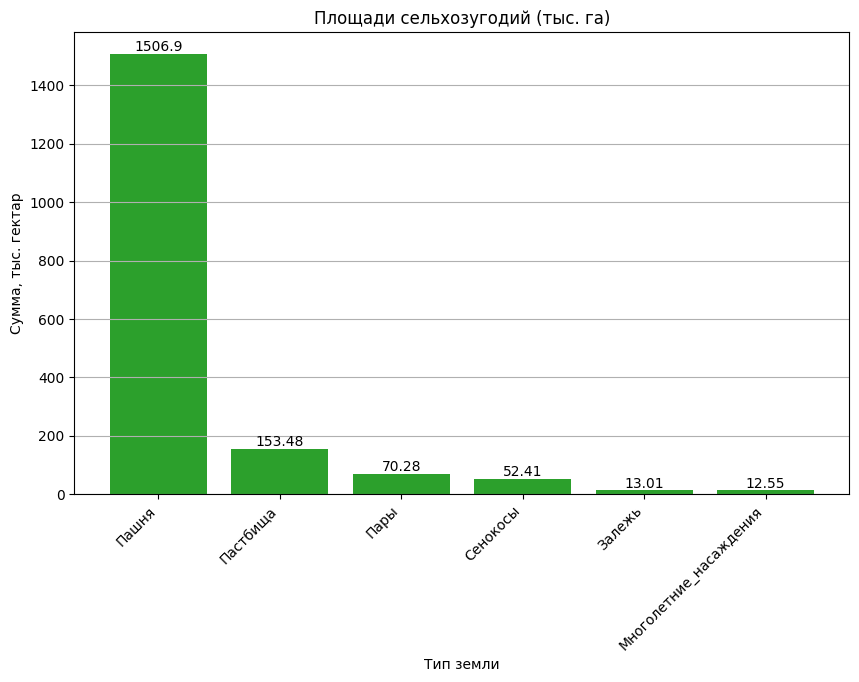

In [14]:
import matplotlib.pyplot as plt

land_df_filtered = land_df[(land_df['Тип_земли'] != 'Общая_площадь') & (land_df['Тип_земли'] != 'Сельскохозяйственные_угодья')]

plt.figure(figsize=(10, 6))
plt.bar(land_df_filtered['Тип_земли'], land_df_filtered['Сумма_тыс_га'], color='tab:green')
plt.xlabel('Тип земли')
plt.ylabel('Сумма, тыс. гектар')
plt.title('Площади сельхозугодий (тыс. га)')
for i, value in enumerate(land_df_filtered['Сумма_тыс_га']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.show()

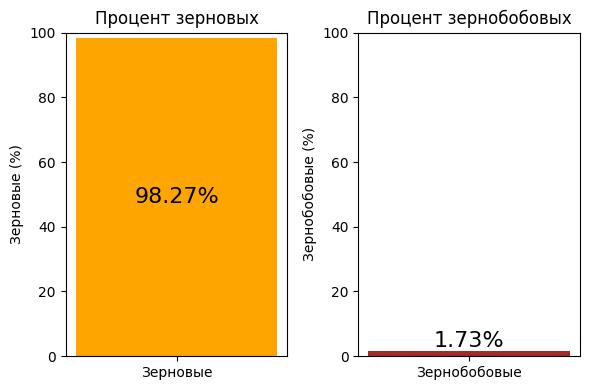

In [15]:
Зернобобовые = (data['Зернобобовые_культуры'].sum()) / (data['Зерновые_и_зернобобовые'].sum()) * 100
Зерновые = 100 - Зернобобовые

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
bar = plt.bar(['Зерновые'], [Зерновые], color='orange')
plt.ylabel('Зерновые (%)')
plt.title('Процент зерновых')
plt.ylim(0, 100)
for b in bar:
    yval = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, yval/2, f'{Зерновые:.2f}%', ha='center',
             va='center', fontsize=16, color='black')
plt.subplot(1, 2, 2)
plt.bar(['Зернобобовые'], [Зернобобовые], color='brown')
plt.ylabel('Зернобобовые (%)')
plt.title('Процент зернобобовых')
plt.ylim(0, 100)
plt.text(0, Зернобобовые, f'{Зернобобовые:.2f}%', ha='center', va='bottom', fontsize=16, color='black')
plt.tight_layout()
plt.show()

In [16]:
col_cereals = ['Пшеница_озимая', 'Пшеница_яровая',
            'Рожь_озимая', 'Ячмень_озимый',
            'Кукуруза_на_зерно',]

land_cer = {}
land_cer['Зерновые'] = (data['Зерновые_и_зернобобовые'].sum() - data['Зернобобовые_культуры'].sum()) / 1000

for col in col_cereals:
    value = data[col].sum() / 1000
    land_cer[col] = value.round(2)

land_cer = pd.DataFrame(list(land_cer.items()), columns=['Тип_культуры', 'Площадь_тыс_га'])
land_cer['Доля от общей площади (%)'] = (land_cer['Площадь_тыс_га'] / land_cer.loc[0, 'Площадь_тыс_га'] * 100).round(2)
land_cer = land_cer.sort_values('Площадь_тыс_га', axis=0, ascending=False)
land_cer

,Тип_культуры,Площадь_тыс_га,Доля от общей площади (%)
0,Зерновые,725.815502,100.00
1,Пшеница_озимая,301.670000,41.56
5,Кукуруза_на_зерно,165.590000,22.81
2,Пшеница_яровая,17.630000,2.43
4,Ячмень_озимый,0.750000,0.10
3,Рожь_озимая,0.260000,0.04


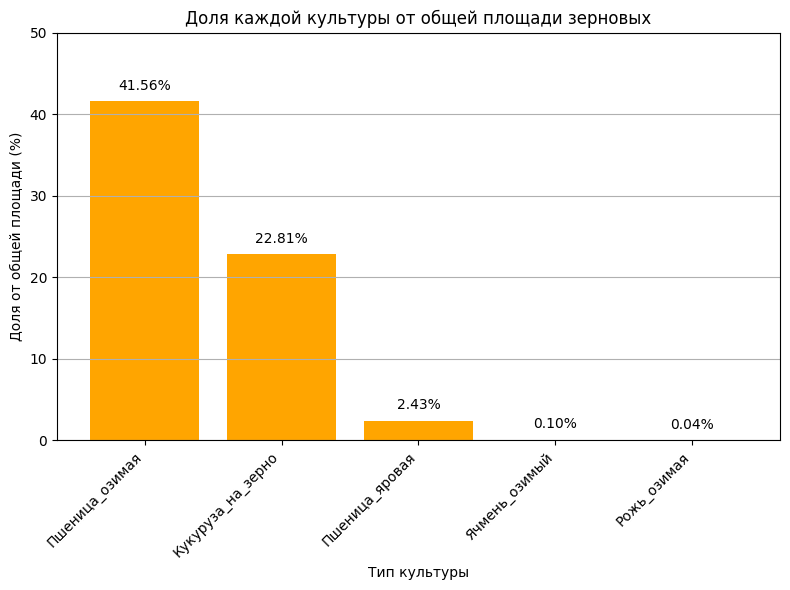

In [17]:
land_cer = land_cer[land_cer['Тип_культуры'] != 'Зерновые']
plt.figure(figsize=(8, 6))
plt.bar(land_cer['Тип_культуры'], land_cer['Доля от общей площади (%)'], color='orange')
plt.xlabel('Тип культуры')
plt.ylabel('Доля от общей площади (%)')
plt.title('Доля каждой культуры от общей площади зерновых')
plt.ylim(0, 50)
for i, value in enumerate(land_cer['Доля от общей площади (%)']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
col_legumes = ['Зернобобовые_культуры', 'Горох']

land_l = {}

for col in col_legumes:
    value = data[col].sum() / 1000
    land_l[col] = value.round(2)

land_l = pd.DataFrame(list(land_l.items()), columns=['Тип_культуры', 'Площадь_тыс_га'])
land_l['Доля от общей площади (%)'] = (land_l['Площадь_тыс_га'] / land_l.loc[0, 'Площадь_тыс_га'] * 100).round(2)
land_l = land_l.sort_values('Площадь_тыс_га', axis=0, ascending=False)
land_l

,Тип_культуры,Площадь_тыс_га,Доля от общей площади (%)
0,Зернобобовые_культуры,12.76,100.00
1,Горох,6.62,51.88


In [19]:
col_t = ['Технические_культуры', 'Подсолнечник_на_зерно',
         'Свекла_сахарная', 'Соя', 'Рапс яровой']

land_t = {}

for col in col_t:
    value = data[col].sum() / 1000
    land_t[col] = value.round(2)

land_t = pd.DataFrame(list(land_t.items()), columns=['Тип_культуры', 'Площадь_тыс_га'])
land_t['Доля от общей площади (%)'] = (land_t['Площадь_тыс_га'] / land_t.loc[0, 'Площадь_тыс_га'] * 100).round(2)
land_t = land_t.sort_values('Площадь_тыс_га', axis=0, ascending=False)
land_t

,Тип_культуры,Площадь_тыс_га,Доля от общей площади (%)
0,Технические_культуры,449.73,100.00
3,Соя,210.94,46.90
1,Подсолнечник_на_зерно,143.36,31.88
2,Свекла_сахарная,77.28,17.18
4,Рапс яровой,3.80,0.84


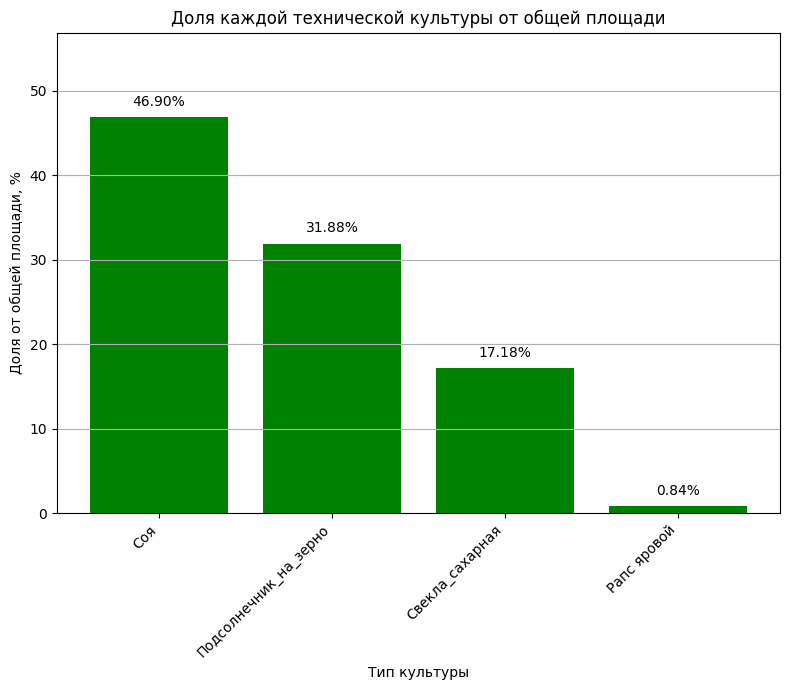

In [21]:
land_t = land_t[land_t['Тип_культуры'] != 'Технические_культуры']

plt.figure(figsize=(8, 7))
plt.bar(land_t['Тип_культуры'], land_t['Доля от общей площади (%)'], color='green')
plt.xlabel('Тип культуры')
plt.ylabel('Доля от общей площади, %')
plt.title('Доля каждой технической культуры от общей площади')
plt.ylim(0, max(land_t['Доля от общей площади (%)']) + 10)
for i, value in enumerate(land_t['Доля от общей площади (%)']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [22]:
data.columns

Index(['Работники', 'В_сельхозпроизводстве', 'Постоянные', 'Сезонные',
       'Общая_площадь', 'Сельскохозяйственные_угодья', 'Пашня', 'Пары',
       'Сенокосы', 'Пастбища', 'Многолетние_насаждения', 'Залежь',
       'Зерновые_и_зернобобовые', 'Пшеница_озимая', 'Пшеница_яровая',
       'Рожь_озимая', 'Ячмень_озимый', 'Кукуруза_на_зерно',
       'Зернобобовые_культуры', 'Горох', 'Подсолнечник_на_зерно', 'Rai',
       'ТипХоз', 'Технические_культуры', 'Свекла_сахарная', 'Соя',
       'Рапс яровой', 'Тракторы', 'КРС_молоко', 'КРС_мясной', 'Картофель',
       'Овощные_и_бахчевые', 'Кормовые_культуры', 'Плодовые_и_ягодные', 'КРС',
       'Коровы_молочные', 'Свиньи', 'Овцы', 'Козы', 'Птица', 'Лошади',
       'Кролики', 'Region', 'Kf_hoz', 'Kf_A200'],
      dtype='object')

In [23]:
categories = ['Общая_площадь', 'Зернобобовые_культуры',
              'Технические_культуры', 'Овощные_и_бахчевые', 'Картофель',
              'Кормовые_культуры', 'Плодовые_и_ягодные']

total_area_df = pd.DataFrame(columns=['Категория', 'Сумма_тыс_га'])

for category in categories:
    value = data[category].sum() / 1000
    total_area_df = total_area_df.append({'Категория': category, 'Сумма_тыс_га': value}, ignore_index=True)

zeronovye_value = (data['Зерновые_и_зернобобовые'].sum() - data['Зернобобовые_культуры'].sum()) / 1000
total_area_df = total_area_df.append({'Категория': 'Зерновые', 'Сумма_тыс_га': zeronovye_value}, ignore_index=True)
total_area_df = total_area_df.sort_values('Сумма_тыс_га', ascending=False)
total_area_df['Доля от общей площади (%)'] = (total_area_df['Сумма_тыс_га'] / total_area_df.loc[0, 'Сумма_тыс_га'] * 100).round(2)

total_area_df

,Категория,Сумма_тыс_га,Доля от общей площади (%)
0,Общая_площадь,1814.655224,100.00
7,Зерновые,725.815502,40.00
2,Технические_культуры,449.727943,24.78
5,Кормовые_культуры,188.495960,10.39
4,Картофель,37.566389,2.07
3,Овощные_и_бахчевые,20.000936,1.10
1,Зернобобовые_культуры,12.759050,0.70
6,Плодовые_и_ягодные,5.276070,0.29


In [24]:
other_sum = total_area_df['Сумма_тыс_га'].iloc[1:].sum()

other_row = {
    'Категория': 'Другое',
    'Сумма_тыс_га': total_area_df.loc[0, 'Сумма_тыс_га'] - other_sum,
    'Доля от общей площади (%)': 100 - total_area_df['Доля от общей площади (%)'].iloc[1:].sum()
}

total_area_df = total_area_df.append(other_row, ignore_index=True)

In [25]:
print(total_area_df['Категория'])

0            Общая_площадь
1                 Зерновые
2     Технические_культуры
3        Кормовые_культуры
4                Картофель
5       Овощные_и_бахчевые
6    Зернобобовые_культуры
7       Плодовые_и_ягодные
8                   Другое
Name: Категория, dtype: object


In [26]:
import seaborn as sns

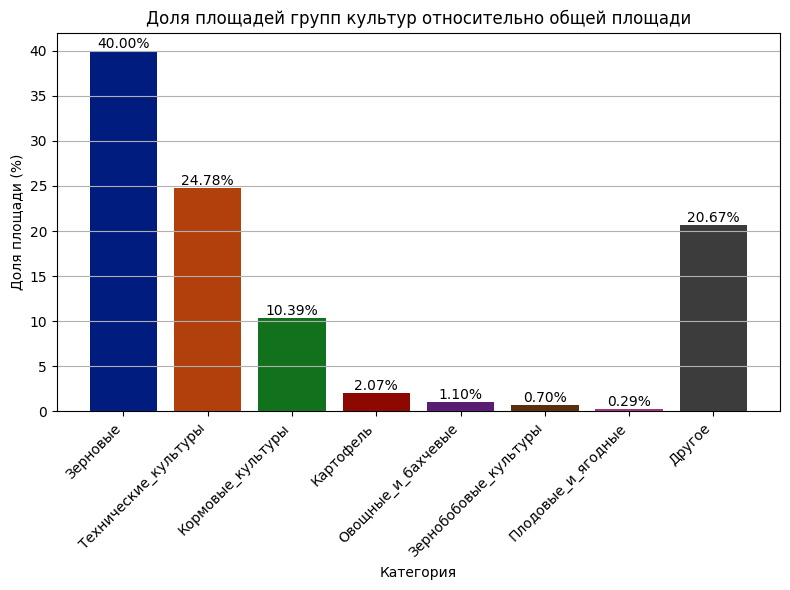

In [27]:
colors = sns.color_palette('dark')
plt.figure(figsize=(8, 6))
bars = plt.bar(total_area_df.loc[1:, 'Категория'], total_area_df.loc[1:, 'Доля от общей площади (%)'], color=colors)
for bar, label in zip(bars, total_area_df.loc[1:, 'Доля от общей площади (%)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Доля площадей групп культур относительно общей площади')
plt.xlabel('Категория')
plt.ylabel('Доля площади (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [28]:
data['Зерновые'] = data['Зерновые_и_зернобобовые'] - data['Зернобобовые_культуры']

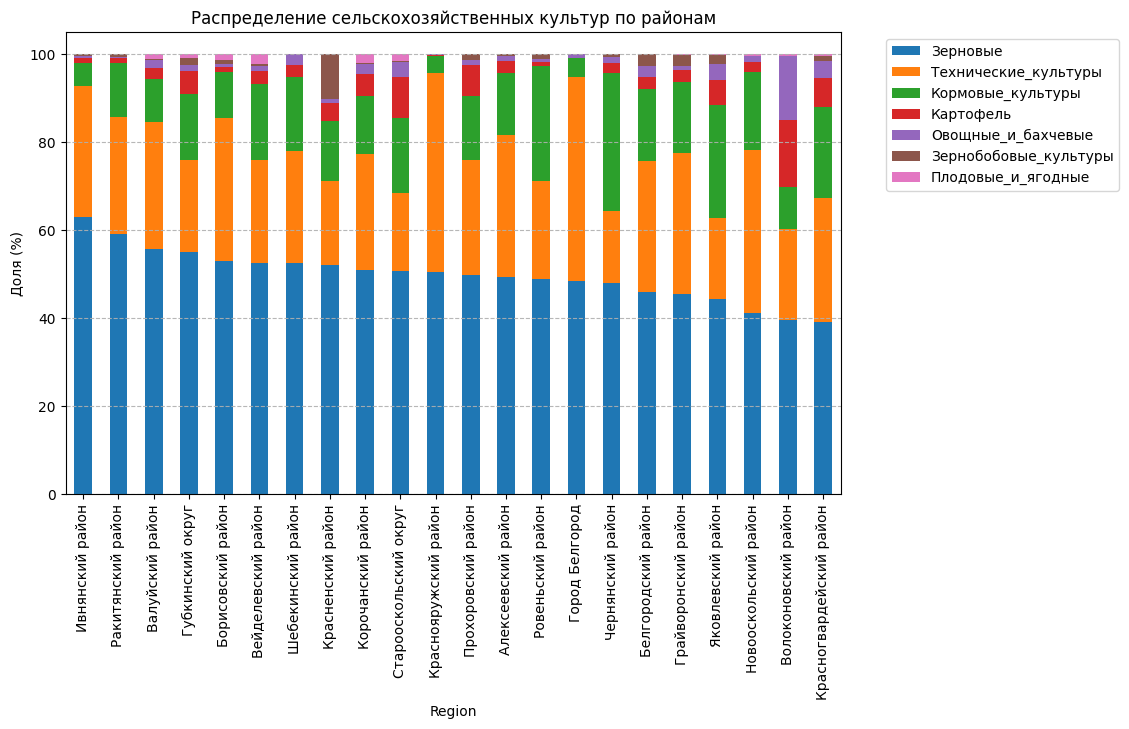

In [32]:
selected_columns = ['Зерновые', 'Технические_культуры', 'Кормовые_культуры', 'Картофель',
                     'Овощные_и_бахчевые', 'Зернобобовые_культуры', 'Плодовые_и_ягодные', 'Region']

df_selected = data[selected_columns]

df_grouped = df_selected.groupby('Region').sum()

df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

df_percentage = df_percentage.sort_values(by='Зерновые', ascending=False)

ax = df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Доля (%)')
ax.set_title('Распределение сельскохозяйственных культур по районам')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.grid(True, linestyle='--', alpha=0.9)
plt.show()

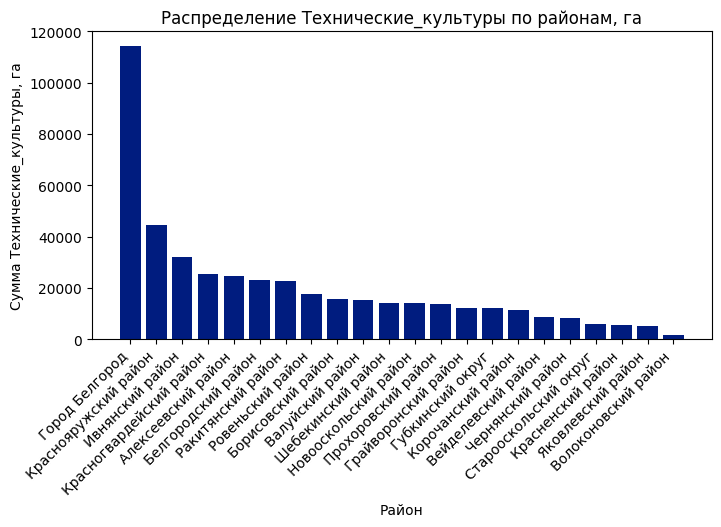

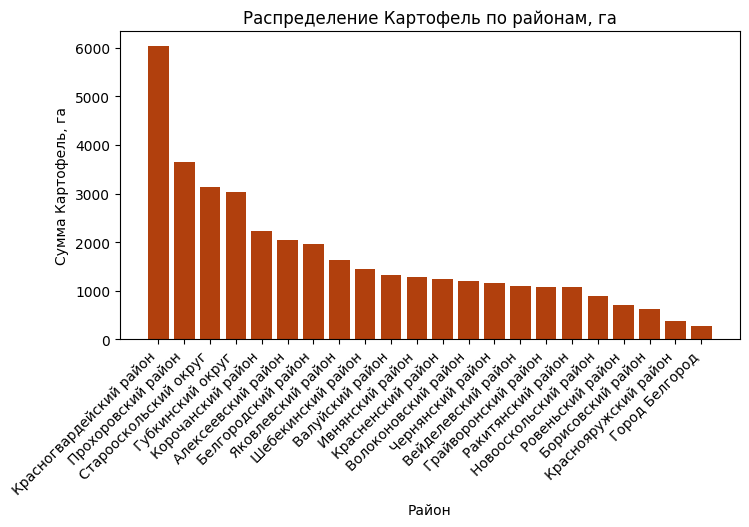

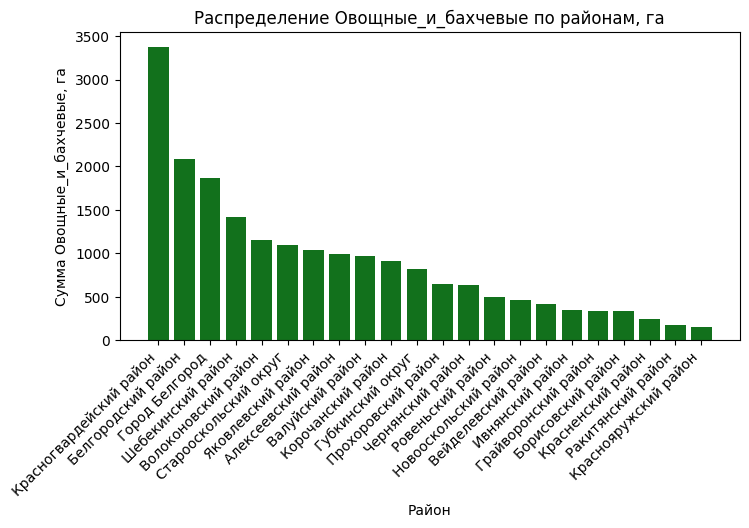

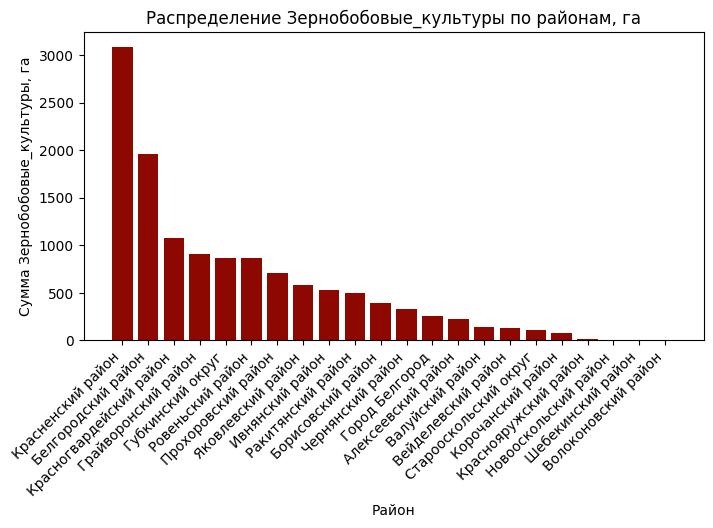

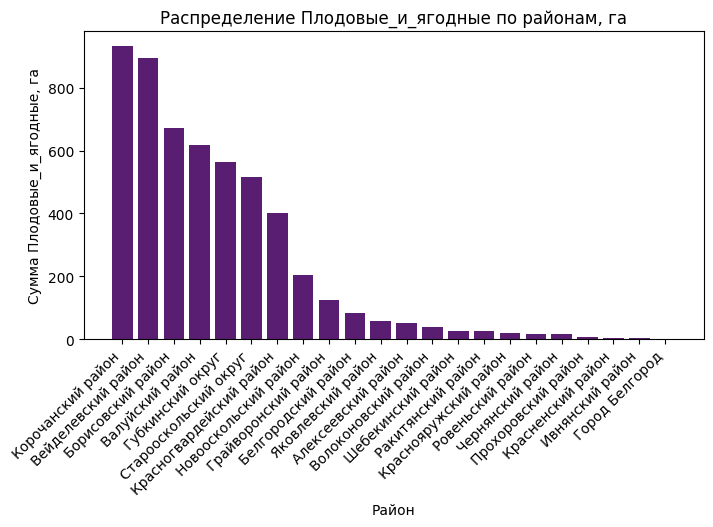

In [33]:
selected_columns = ['Технические_культуры', 'Картофель',
                     'Овощные_и_бахчевые', 'Зернобобовые_культуры', 'Плодовые_и_ягодные', 'Region']

df_grouped = data[selected_columns].groupby('Region').sum()

colors = sns.color_palette('dark')

for i, culture in enumerate(df_grouped.columns):
    df_sorted = df_grouped.sort_values(by=culture, ascending=False)
    plt.figure(figsize=(8, 4))
    plt.bar(df_sorted.index, df_sorted[culture], color=colors[i])
    plt.title(f'Распределение {culture} по районам, га')
    plt.xlabel('Район')
    plt.ylabel(f'Сумма {culture}, га')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [34]:
import plotly.express as px

In [ ]:
import geopandas as gpd

geojson_path = "/content/drive/MyDrive/ForColab/Белгородская область_Belgorod region.geojson"
gdf = gpd.read_file(geojson_path)

district_names = gdf["district"].unique()
district_names

array(['Алексеевка', 'Белгородский район', 'Борисовский район',
       'Валуйский', 'Вейделевский район', 'Волоконовский район',
       'Грайворонский район', 'Ивнянский район', 'Корочанский район',
       'Красненский район', 'Красногвардейский район',
       'Краснояружский район', 'Новооскольский район',
       'Прохоровский район', 'Ракитянский район', 'Ровеньский район',
       'Чернянский район', 'Шебекино', 'Яковлевский район', 'Белгород',
       'Губкинский', 'Старооскольский'], dtype=object)

In [ ]:
district_mapping = {
    'Алексеевка': 'Алексеевский район',
    'Яковлевский район': 'Яковлевский район',
    'Ивнянский район': 'Ивнянский район',
    'Красненский район': 'Красненский район',
    'Корочанский район': 'Корочанский район',
    'Краснояружский район': 'Краснояружский район',
    'Ровеньский район': 'Ровеньский район',
    'Борисовский район': 'Борисовский район',
    'Белгородский район': 'Белгородский район',
    'Красногвардейский район': 'Красногвардейский район',
    'Прохоровский район': 'Прохоровский район',
    'Чернянский район': 'Чернянский район',
    'Валуйский': 'Валуйский район',
    'Ракитянский район': 'Ракитянский район',
    'Волоконовский район': 'Волоконовский район',
    'Грайворонский район': 'Грайворонский район',
    'Новооскольский район': 'Новооскольский район',
    'Вейделевский район': 'Вейделевский район',
    'Шебекино': 'Шебекинский район',
    'Белгород': 'Город Белгород',
    'Губкинский': 'Губкинский округ',
    'Старооскольский': 'Старооскольский округ'
}

gdf['district'] = gdf['district'].map(district_mapping)

output_geojson_path = "/content/Belgorod_region.geojson"
gdf.to_file(output_geojson_path, driver="GeoJSON")

In [ ]:
geo_path = "/content/Belgorod_region.geojson"
gdf = gpd.read_file(geo_path)

# Сгруппируем данные по регионам и вычислим суммы для каждой категории
df_group = data.groupby('Region').agg({
    'Зерновые': 'sum',
    'Технические_культуры': 'sum',
    'Кормовые_культуры': 'sum'
}).reset_index()

In [ ]:
merged_gdf = gdf.set_index('district').join(df_group.set_index('Region')).reset_index()

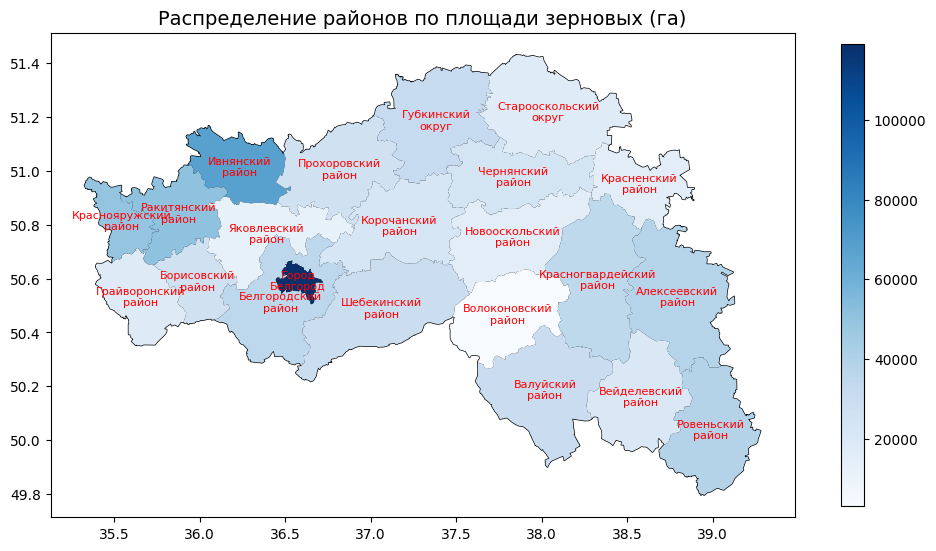

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='white')
merged_gdf.plot(ax=ax, column='Зерновые', cmap='Blues', legend=True, legend_kwds={'shrink': 0.5})
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['district']):
    lines = label.split(' ')
    label = '\n'.join(lines)
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='red')
ax.set_title("Распределение районов по площади зерновых (га)", fontsize=14)
plt.show()

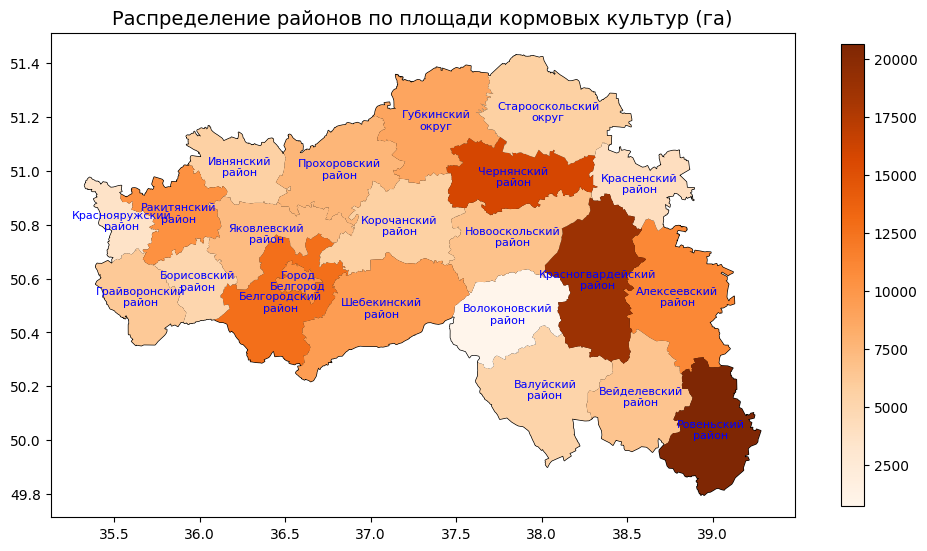

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='white')
merged_gdf.plot(ax=ax, column='Кормовые_культуры', cmap='Oranges', legend=True, legend_kwds={'shrink': 0.5})
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['district']):
    lines = label.split(' ')
    label = '\n'.join(lines)
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='blue')
ax.set_title("Распределение районов по площади кормовых культур (га)", fontsize=14)
plt.show()

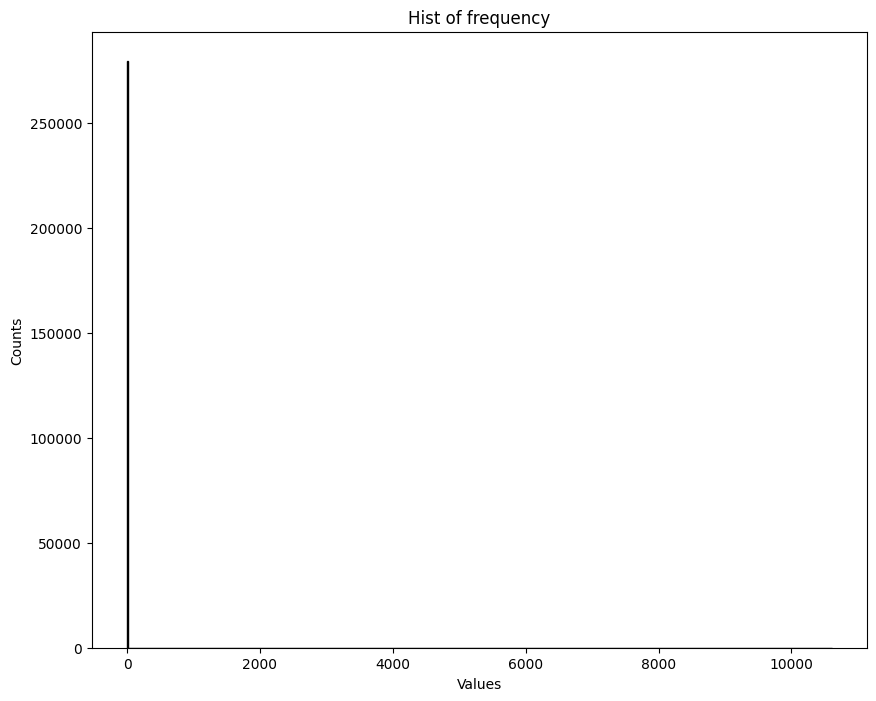

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)
plt.hist(data['Кормовые_культуры'], bins=1000, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Hist of frequency')
plt.show()

In [ ]:
df_clean_corm = data[data['Кормовые_культуры'] != 0]
df_clean_corm['Кормовые_культуры'].describe()

count    66228.000000
mean         2.846167
std         91.556860
min          0.010000
25%          0.070000
50%          0.150000
75%          0.280000
max      10607.099609
Name: Кормовые_культуры, dtype: float64

In [ ]:
strat_boundaries = [0, 0.5, 1.5, 20, 150, float('inf')]
strata_labels = ['сврехмалые', 'малые', 'средние', 'крупные', 'сверхкрупные']
data['strats'] = pd.cut(data['Кормовые_культуры'], bins=strat_boundaries, labels=strata_labels)

In [ ]:
data['strats'].value_counts()

сврехмалые      60177
малые            5556
средние           244
крупные           146
сверхкрупные      105
Name: strats, dtype: int64

In [ ]:
results_df = pd.DataFrame(columns=['Strats', 'Count', 'Percentage', 'Mean', 'Variance'])

for strata in strata_labels:
    current_strata_data = data[data['strats'] == strata]
    count = current_strata_data.shape[0]
    percentage = count / data.shape[0]
    mean = current_strata_data['Кормовые_культуры'].mean()
    variance = current_strata_data['Кормовые_культуры'].var()
    results_df = results_df.append({'Strats': strata, 'Count': count, 'Percentage': percentage,
                                    'Mean': mean, 'Variance': variance}, ignore_index=True)
pd.options.display.float_format = '{:.4f}'.format
results_df

,Strats,Count,Percentage,Mean,Variance
0,сврехмалые,60177,0.2151,0.1608,0.0145
1,малые,5556,0.0199,0.7838,0.0374
2,средние,244,0.0009,7.3449,34.7450
3,крупные,146,0.0005,59.4582,1125.3627
4,сверхкрупные,105,0.0004,1561.8514,2873586.0989


In [ ]:
results_df['real_mean'] = results_df['Percentage']*results_df['Mean']
sum_real_mean = results_df['real_mean'].sum()
sum_real_mean

0.673794238488965

In [ ]:
selected_columns = ['strats', 'Зерновые', 'Технические_культуры', 'Кормовые_культуры', 'Картофель',
                     'Овощные_и_бахчевые', 'Зернобобовые_культуры', 'Плодовые_и_ягодные']

df_strats = data[selected_columns]

df_strats = df_strats.groupby('strats').sum()

df_strats_piv = df_strats.T
pd.options.display.float_format = '{:.2f}'.format
df_strats_piv

strats,сврехмалые,малые,средние,крупные,сверхкрупные
Зерновые,2542.50,633.58,23671.47,52813.39,509244.30
Технические_культуры,715.01,200.01,10046.40,22610.56,345408.20
Кормовые_культуры,9673.75,4354.75,1792.16,8680.90,163994.40
Картофель,6886.08,747.90,99.83,406.35,848.00
Овощные_и_бахчевые,3659.91,348.34,93.86,116.28,41.00
Зернобобовые_культуры,1.85,1.00,577.01,632.00,10003.10
Плодовые_и_ягодные,0.10,0.00,172.50,972.70,415.70


In [ ]:
mapping_org_type = {
    1 : 'СХО',
    2 : 'КФХ',
    3 : 'ХозНаселения',
    4 : 'СадоводОбъединения'
}

data['ТипХозяйства']=data['ТипХоз'].replace(mapping_org_type)
data['ТипХозяйства'].value_counts()

ХозНаселения          267524
СадоводОбъединения     10448
КФХ                     1492
СХО                      289
Name: ТипХозяйства, dtype: int64

In [ ]:
data = data.drop('ТипХоз', axis=1)

In [ ]:
categ = ['Общая_площадь', 'Зерновые', 'Зернобобовые_культуры',
         'Технические_культуры', 'Овощные_и_бахчевые', 'Картофель',
         'Кормовые_культуры', 'Плодовые_и_ягодные', 'ТипХозяйства']
df_hoztype = data[categ]
df_hozgrouped = df_hoztype.groupby('ТипХозяйства').sum()
df_hozgrouped = df_hozgrouped.T
df_hozgrouped['% от общей площади (КФХ)'] = (df_hozgrouped['КФХ'] / df_hozgrouped.iloc[0]['КФХ'] * 100).round(2)
df_hozgrouped['% от общей площади (СХО)'] = (df_hozgrouped['СХО'] / df_hozgrouped.iloc[0]['СХО'] * 100).round(2)
df_hozgrouped['% от общей площади (СОД)'] = (df_hozgrouped['СадоводОбъединения'] / df_hozgrouped.iloc[0]['СадоводОбъединения'] * 100).round(2)
df_hozgrouped['% от общей площади (ХН)'] = (df_hozgrouped['ХозНаселения'] / df_hozgrouped.iloc[0]['ХозНаселения'] * 100).round(2)
df_perc = df_hozgrouped.filter(like='%')
df_perc

ТипХозяйства,% от общей площади (КФХ),% от общей площади (СХО),% от общей площади (СОД),% от общей площади (ХН)
Общая_площадь,100.00,100.00,100.00,100.00
Зерновые,52.55,40.71,0.00,7.09
Зернобобовые_культуры,0.94,0.72,0.00,0.02
Технические_культуры,24.14,26.92,0.00,2.14
Овощные_и_бахчевые,0.21,0.20,12.34,13.26
Картофель,0.18,0.08,18.82,29.38
Кормовые_культуры,6.14,11.05,0.00,12.58
Плодовые_и_ягодные,0.51,0.28,0.00,0.00


In [ ]:
categ = ['Зерновые', 'Зернобобовые_культуры',
         'Технические_культуры', 'Овощные_и_бахчевые', 'Картофель',
         'Кормовые_культуры', 'Плодовые_и_ягодные', 'ТипХозяйства']
df_hoztype = data[categ]
df_hozgrouped = df_hoztype.groupby('ТипХозяйства').sum()
df_hozgrouped = df_hozgrouped.T
df_hozgrouped['Сумма'] = df_hozgrouped.sum(axis=1)
df_hozgrouped_percent = df_hozgrouped.div(df_hozgrouped['Сумма'], axis=0) * 100
df_hozgrouped_percent

ТипХозяйства,КФХ,СХО,СадоводОбъединения,ХозНаселения,Сумма
Зерновые,18.58,80.29,0.00,1.13,100.00
Зернобобовые_культуры,18.81,80.99,0.00,0.20,100.00
Технические_культуры,13.77,85.68,0.00,0.55,100.00
Овощные_и_бахчевые,2.63,14.03,6.85,76.48,100.00
Картофель,1.20,3.02,5.56,90.22,100.00
Кормовые_культуры,8.35,83.94,0.00,7.70,100.00
Плодовые_и_ягодные,25.02,74.98,0.00,0.00,100.00


In [ ]:
to_plants = [
    'Зерновые_и_зернобобовые', 'Технические_культуры',
    'Овощные_и_бахчевые', 'Кормовые_культуры',
    'Плодовые_и_ягодные', 'Картофель'
]

data['Растениеводство'] = data[to_plants].sum(axis=1)

In [ ]:
for_gini = ['Зерновые', 'Зернобобовые_культуры',
         'Технические_культуры', 'Овощные_и_бахчевые', 'Картофель',
         'Кормовые_культуры', 'Плодовые_и_ягодные', 'Region']
df_region = data[for_gini]
df_region = df_region.groupby('Region').sum()

In [ ]:
def lorenz_curve_gini(data, columnName=None, ax=None, figsize=(10, 10)):
    if isinstance(data, (list, np.ndarray)):
        data = np.array(data)
        sorted_data = np.sort(data)
    elif isinstance(data, pd.DataFrame):
        if columnName is not None:
            sorted_data = data[columnName].sort_values(ascending=True).values
        else:
            raise ValueError("If data is a DataFrame, columnName must be specified.")
    else:
        raise ValueError("data should be a DataFrame, list, or NumPy array.")

    total_income = sorted_data.sum()
    cumulative_income = np.cumsum(sorted_data) / total_income
    cumulative_population = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    ax.plot(cumulative_population, cumulative_income, label='Lorenz curve',
            color='tab:red', linewidth=2.0)
    ax.plot([0, 1], [0, 1], 'k--', label='Equality Line',
            linewidth=2.0, color='tab:green')
    ax.set_title(f'Кривая Лоренца для {columnName}', fontsize=12)
    ax.grid()
    ax.set_aspect('equal')
    gini_coef = 2 * (0.5 - np.trapz(cumulative_income, cumulative_population))
    ax.text(0.6, 0.25, f'Джини: {gini_coef:.3f}', fontsize=10, color='darkblue')
    ax.legend()

    return gini_coef

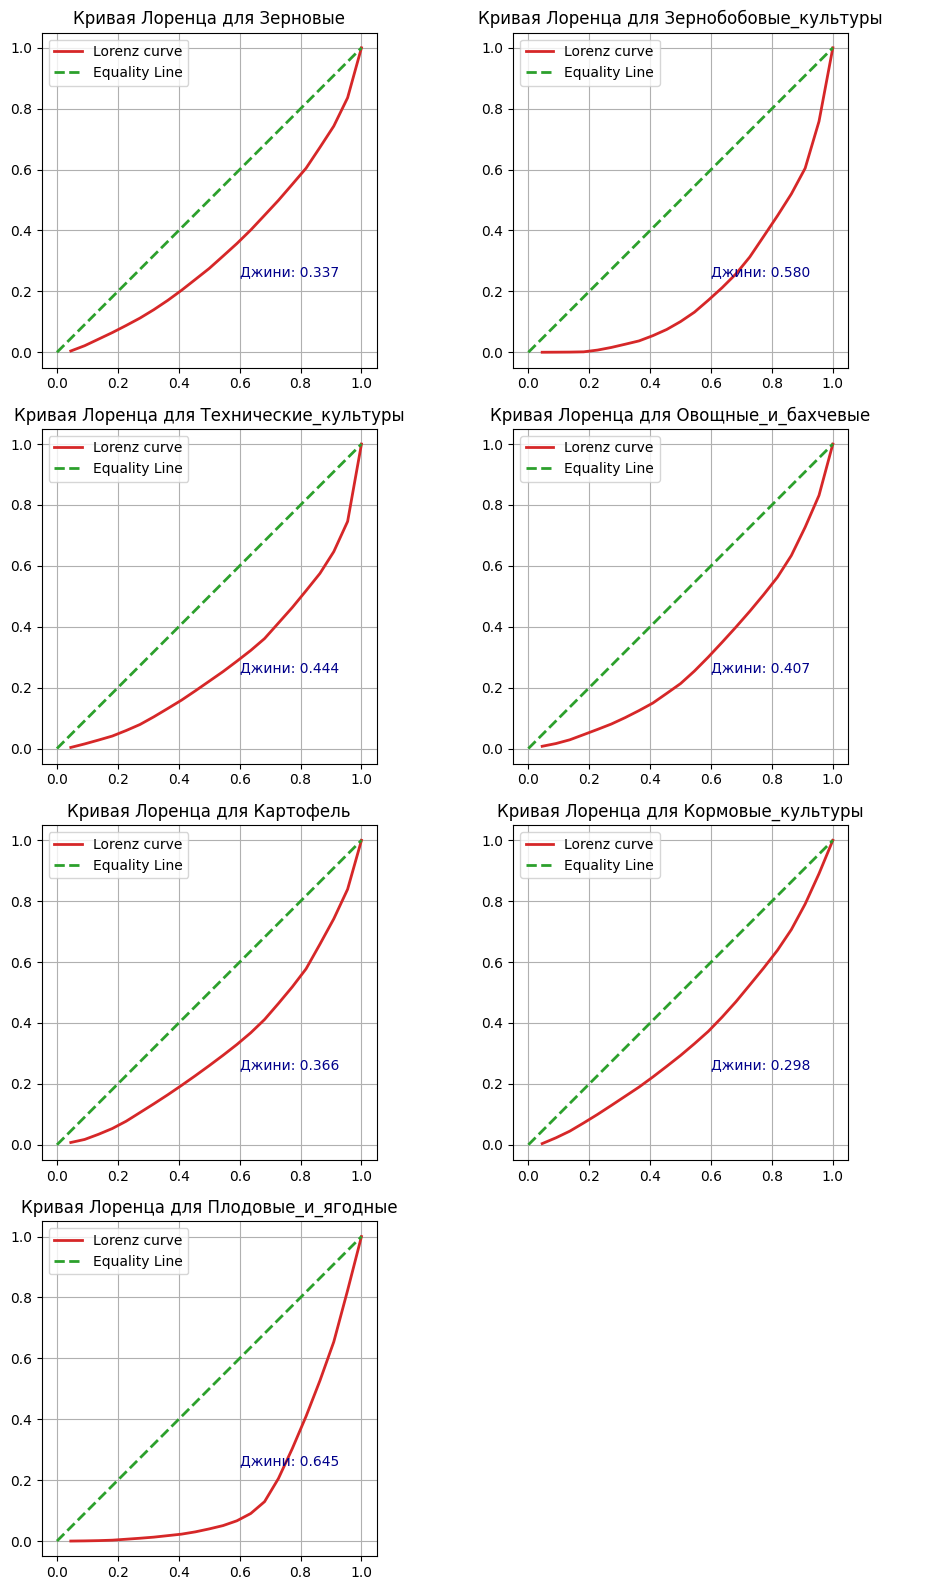

In [ ]:
for_gini = ['Зерновые', 'Зернобобовые_культуры',
         'Технические_культуры', 'Овощные_и_бахчевые', 'Картофель',
         'Кормовые_культуры', 'Плодовые_и_ягодные']

num_cols = 2
num_rows = (len(for_gini) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 16))
for i, crop_type in enumerate(for_gini):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    lorenz_curve_gini(df_region, crop_type, ax=ax)
if len(for_gini) % num_cols != 0:
    axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
df_group = data.groupby('Region').agg({
    'Плодовые_и_ягодные': 'sum'}).reset_index()

In [ ]:
merged_gdf = gdf.set_index('district').join(df_group.set_index('Region')).reset_index()

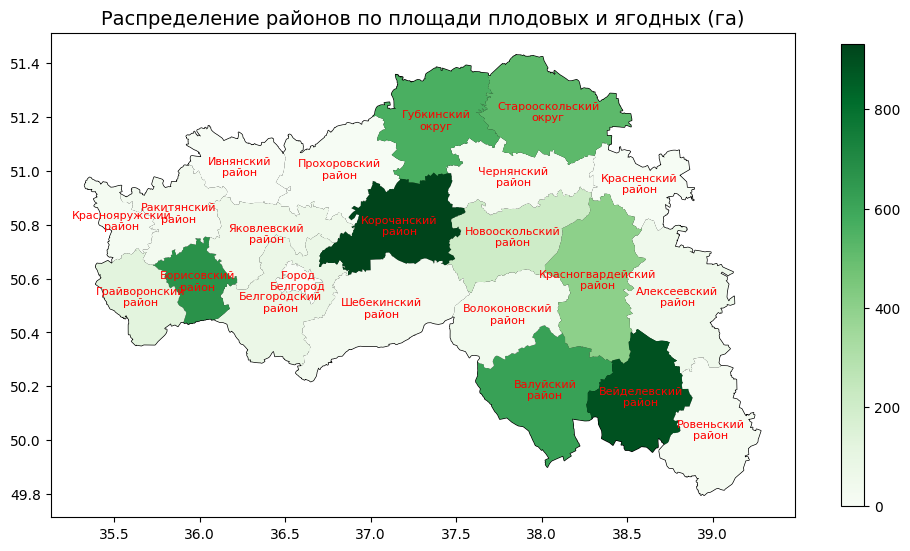

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='white')
merged_gdf.plot(ax=ax, column='Плодовые_и_ягодные', cmap='Greens', legend=True, legend_kwds={'shrink': 0.5})
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['district']):
    lines = label.split(' ')
    label = '\n'.join(lines)
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='red')
ax.set_title("Распределение районов по площади плодовых и ягодных (га)", fontsize=14)
plt.show()

In [ ]:
krs_milk_cow = (data['Коровы_молочные'].sum() / data['КРС_молоко'].sum()) * 100
krs_milk_cow

38.21505016268367

In [ ]:
krs_milk = (data['КРС_молоко'].sum() / data['КРС'].sum()) * 100
krs_milk

98.1008527961147

In [ ]:
krs_meet = (data['КРС_мясной'].sum() / data['КРС'].sum()) * 100
krs_meet

1.8991472038853054

In [ ]:
categ_meet = ['КРС_молоко', 'КРС_мясной', 'Свиньи',
              'Овцы', 'Козы', 'Птица', 'Лошади', 'Кролики', 'ТипХозяйства']
df_meet = data[categ_meet]
df_meetgp = df_meet.groupby('ТипХозяйства').sum()
df_meetgp = df_meetgp.T
df_meetgp

ТипХозяйства,КФХ,СХО,СадоводОбъединения,ХозНаселения
КРС_молоко,16916.00,157928.00,0.00,46137.00
КРС_мясной,1337.00,2941.00,0.00,0.00
Свиньи,0.00,4216406.00,0.00,41.00
Овцы,10154.00,11851.00,0.00,59457.00
Козы,448.00,0.00,25.00,26437.00
Птица,98449.00,47556407.00,1589.00,2205526.00
Лошади,75.00,663.00,0.00,1731.00
Кролики,2122.00,712.00,179.00,155748.00


In [ ]:
df_meetgp['Сумма'] = df_meetgp.sum(axis=1)
df_meetgp_perc = df_meetgp.div(df_meetgp['Сумма'], axis=0) * 100

df_meetgp_perc

ТипХозяйства,КФХ,СХО,СадоводОбъединения,ХозНаселения,Сумма
КРС_молоко,7.65,71.47,0.00,20.88,100.00
КРС_мясной,31.25,68.75,0.00,0.00,100.00
Свиньи,0.00,100.00,0.00,0.00,100.00
Овцы,12.46,14.55,0.00,72.99,100.00
Козы,1.66,0.00,0.09,98.24,100.00
Птица,0.20,95.38,0.00,4.42,100.00
Лошади,3.04,26.85,0.00,70.11,100.00
Кролики,1.34,0.45,0.11,98.10,100.00


In [ ]:
categ_meet = ['КРС_молоко', 'КРС_мясной', 'Свиньи',
              'Овцы', 'Козы', 'Птица', 'Лошади', 'Кролики', 'Region']
df_meet = data[categ_meet]
df_meetgp = df_meet.groupby('Region').sum()

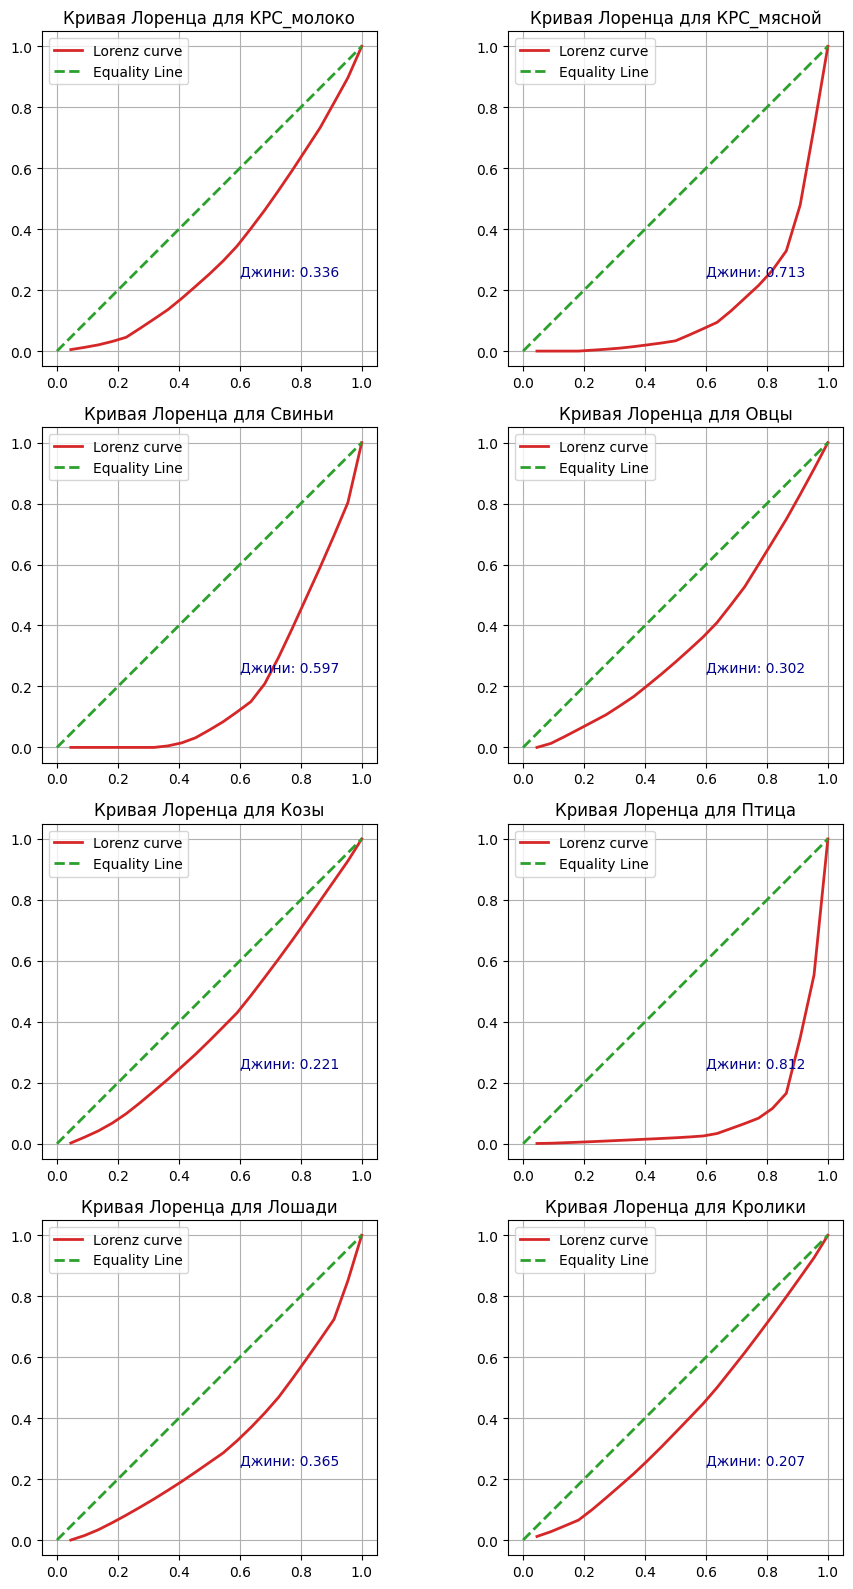

In [ ]:
for_gini = ['КРС_молоко', 'КРС_мясной', 'Свиньи',
              'Овцы', 'Козы', 'Птица', 'Лошади', 'Кролики']
num_cols = 2
num_rows = (len(for_gini) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 16))
for i, meet_type in enumerate(for_gini):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    lorenz_curve_gini(df_meetgp, meet_type, ax=ax)
if len(for_gini) % num_cols != 0:
    axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
df_group = data.groupby('Region').agg({
    'КРС_молоко': 'sum',
    'КРС_мясной': 'sum',
    'Свиньи': 'sum',
    'Птица': 'sum'
    }).reset_index()

In [ ]:
merged_gdf = gdf.set_index('district').join(df_group.set_index('Region')).reset_index()

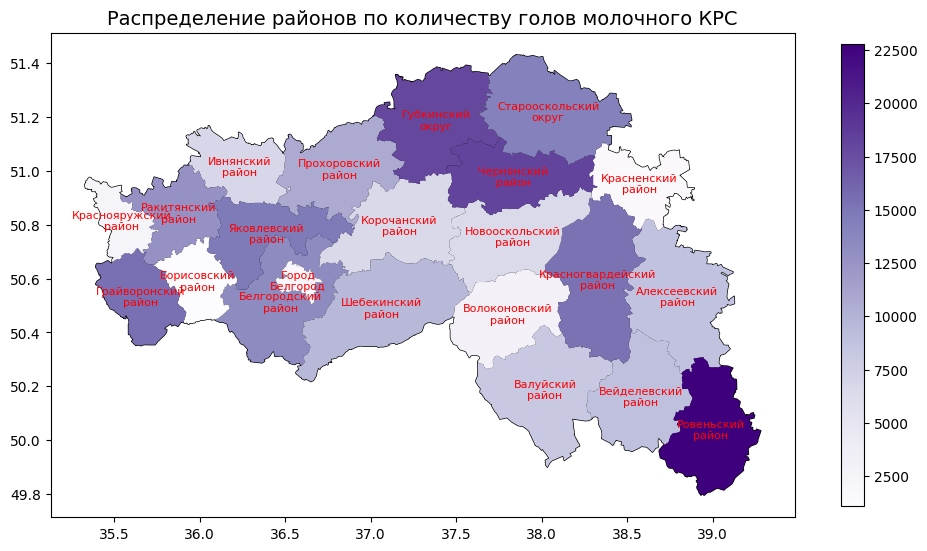

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='white')
merged_gdf.plot(ax=ax, column='КРС_молоко', cmap='Purples', legend=True, legend_kwds={'shrink': 0.5})
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['district']):
    lines = label.split(' ')
    label = '\n'.join(lines)
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='red')
ax.set_title("Распределение районов по количеству голов молочного КРС", fontsize=14)
plt.show()

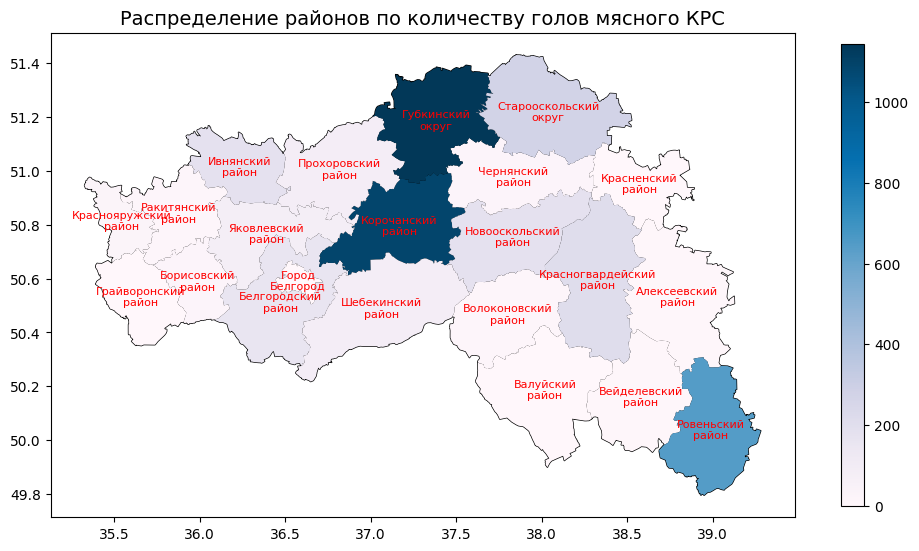

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='white')
merged_gdf.plot(ax=ax, column='КРС_мясной', cmap='PuBu', legend=True, legend_kwds={'shrink': 0.5})
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['district']):
    lines = label.split(' ')
    label = '\n'.join(lines)
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='red')
ax.set_title("Распределение районов по количеству голов мясного КРС", fontsize=14)
plt.show()

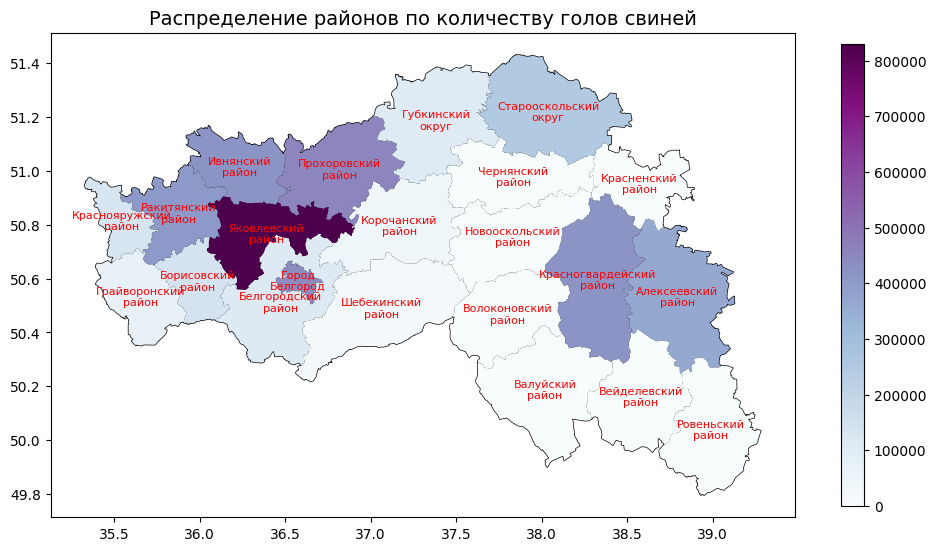

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='white')
merged_gdf.plot(ax=ax, column='Свиньи', cmap='BuPu', legend=True, legend_kwds={'shrink': 0.5})
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['district']):
    lines = label.split(' ')
    label = '\n'.join(lines)
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='red')
ax.set_title("Распределение районов по количеству голов свиней", fontsize=14)
plt.show()

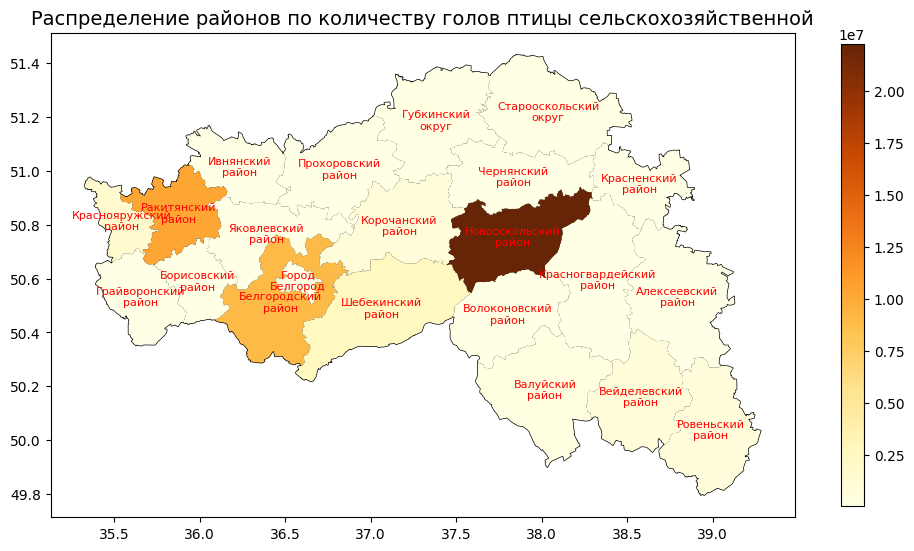

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='white')
merged_gdf.plot(ax=ax, column='Птица', cmap='YlOrBr', legend=True, legend_kwds={'shrink': 0.5})
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['district']):
    lines = label.split(' ')
    label = '\n'.join(lines)
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='red')
ax.set_title("Распределение районов по количеству голов птицы сельскохозяйственной", fontsize=14)
plt.show()

In [ ]:
df_money = pd.read_excel('/content/drive/MyDrive/ForColab/СХО_данные для группировки.xlsx', sheet_name='2')
df_money = df_money[['Субъект РФ', '16000', '16001', '15460', '15520', '14120']]
df_money.columns

Index(['Субъект РФ', '16000', '16001', '15460', '15520', '14120'], dtype='object')

In [ ]:
map_money = {
    '16000': 'Число_хозяйств',
    '16001': 'Число_приб_хоз',
    '15460': 'Субсидии_на_свиней',
    '15520': 'Субсидии_на_животнводство(другие)',
    '14120': 'Поголовье (выращивание и откорм)'
}

df_money.rename(columns=map_money, inplace=True)

In [ ]:
df_moneygp = df_money[['Число_приб_хоз', 'Число_хозяйств', 'Субъект РФ']].groupby('Субъект РФ').sum()

In [ ]:
df_moneygp['% прибыльных хоз-в'] = (df_moneygp['Число_приб_хоз'] / df_moneygp['Число_хозяйств']) * 100
df_moneygp

,Число_приб_хоз,Число_хозяйств,% прибыльных хоз-в
Субъект РФ,,,
Белгородская область,146,211,69.19
Брянская область,83,102,81.37
Владимирская область,54,62,87.10
Воронежская область,236,276,85.51
Ивановская область,35,47,74.47
Калужская область,40,56,71.43
Костромская область,29,48,60.42
Краснодарский край,339,382,88.74
Курская область,108,156,69.23


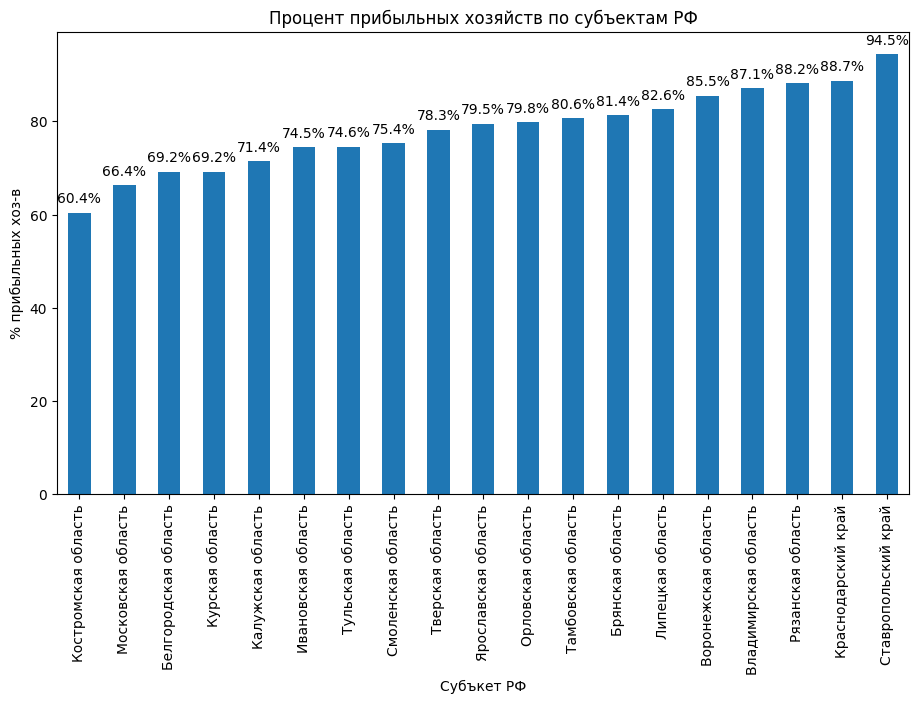

In [ ]:
df_moneygp = df_moneygp.sort_values('% прибыльных хоз-в')
ax = df_moneygp.plot(kind='bar', y='% прибыльных хоз-в', figsize=(11, 6), legend=False)
plt.title('Процент прибыльных хозяйств по субъектам РФ')
plt.xlabel('Субъкет РФ')
plt.ylabel('% прибыльных хоз-в')
for i in ax.patches:
  ax.annotate(f'{i.get_height():.1f}%', (i.get_x() + i.get_width() / 2., i.get_height()),
              ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
df_moneygp = df_money[['Субсидии_на_животнводство(другие)', 'Субсидии_на_свиней',
                       'Поголовье (выращивание и откорм)', 'Субъект РФ']].groupby('Субъект РФ').sum()
df_moneygp = df_moneygp[df_moneygp['Субсидии_на_животнводство(другие)'] != 0]
df_moneygp  = df_moneygp.sort_values('Субсидии_на_животнводство(другие)')
df_moneygp

,Субсидии_на_животнводство(другие),Субсидии_на_свиней,Поголовье (выращивание и откорм)
Субъект РФ,,,
Владимирская область,932,0,70349
Тульская область,1018,17028,54039
Брянская область,2449,0,14802
Тверская область,3797,0,83719
Краснодарский край,4928,140,560174
Рязанская область,7014,1580,37524
Московская область,18250,0,189389
Ставропольский край,19964,9340,177864
Воронежская область,32151,0,106406


In [ ]:
df_moneygp = df_money[['Субсидии_на_животнводство(другие)', 'Субсидии_на_свиней',
                       'Поголовье (выращивание и откорм)', 'Субъект РФ']].groupby('Субъект РФ').sum()
df_moneygp  = df_moneygp.sort_values('Поголовье (выращивание и откорм)')
df_moneygp['% свиней(выращивание и откорм)'] = (df_moneygp['Поголовье (выращивание и откорм)'] / df_moneygp['Поголовье (выращивание и откорм)'].sum()) * 100


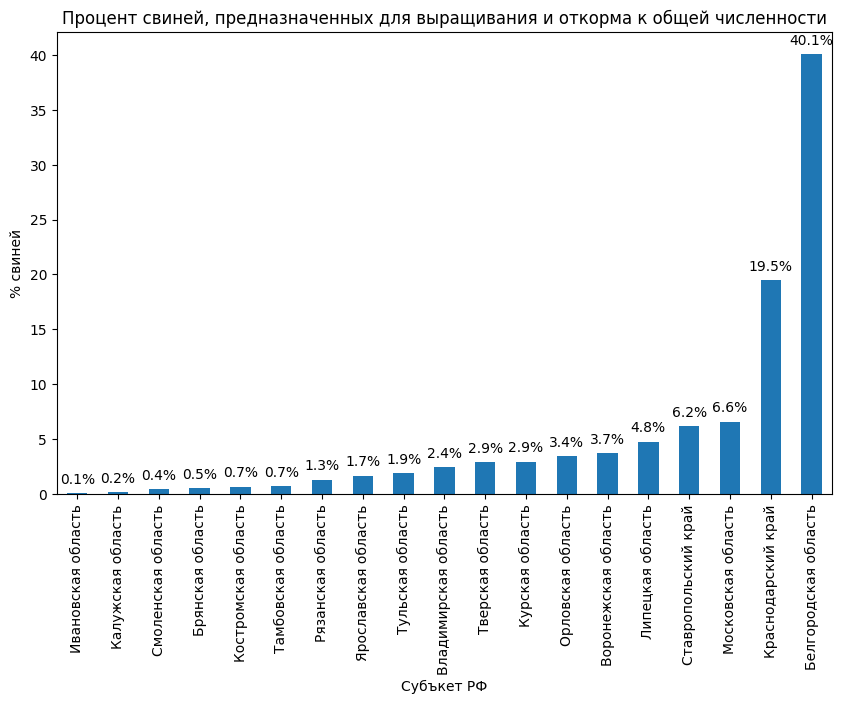

In [ ]:
df_moneygp = df_moneygp.sort_values('% свиней(выращивание и откорм)')
ax = df_moneygp.plot(kind='bar', y='% свиней(выращивание и откорм)', figsize=(10, 6), legend=False)
plt.title('Процент свиней, предназначенных для выращивания и откорма к общей численности')
plt.xlabel('Субъкет РФ')
plt.ylabel('% свиней')
for i in ax.patches:
  ax.annotate(f'{i.get_height():.1f}%', (i.get_x() + i.get_width() / 2., i.get_height()),
              ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
categor_empl = ['ТипХозяйства', 'Работники', 'В_сельхозпроизводстве', 'Постоянные',
           'Сезонные', 'Растениеводство', 'Тракторы']
employes = data[categor_empl]
#employes = employes[employes['Растениеводство'] != 0]
employes = employes.reset_index(drop=True)
employes = employes.drop('Растениеводство', axis=1)
employes_group = employes.groupby('ТипХозяйства').sum()
employes_group = employes_group.T
employes_group

ТипХозяйства,КФХ,СХО,СадоводОбъединения,ХозНаселения
Работники,3455,53962,0,0
В_сельхозпроизводстве,3418,41315,0,0
Постоянные,1575,41770,0,0
Сезонные,177,2002,0,0
Тракторы,2307,4793,0,5657


In [ ]:
employes_group['Сумма'] = employes_group.sum(axis=1)
employes_group_perc = employes_group.div(employes_group['Сумма'], axis=0) * 100

employes_group_perc

ТипХозяйства,КФХ,СХО,СадоводОбъединения,ХозНаселения,Сумма
Работники,6.02,93.98,0.00,0.00,100.00
В_сельхозпроизводстве,7.64,92.36,0.00,0.00,100.00
Постоянные,3.63,96.37,0.00,0.00,100.00
Сезонные,8.12,91.88,0.00,0.00,100.00
Тракторы,18.08,37.57,0.00,44.34,100.00


In [ ]:
employes_group = employes.groupby('ТипХозяйства').mean()
employes_group = employes_group.T
employes_group

ТипХозяйства,КФХ,СХО,СадоводОбъединения,ХозНаселения
Работники,2.32,186.72,0.00,0.00
В_сельхозпроизводстве,2.29,142.96,0.00,0.00
Постоянные,1.06,144.53,0.00,0.00
Сезонные,0.12,6.93,0.00,0.00
Тракторы,1.55,16.58,0.00,0.02
